<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [1]:
# !python -m pip uninstall CompStats

In [2]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@origin/develop
# %pip install -U "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"
# %pip install -U git+https://github.com/INGEOTEC/CompStats@develop
# %pip install -U CompStats

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [3]:
try:
  import CompStats
except ImportError:
    %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance_multiple_metrics` function is used to calculate and analyze the performance of machine learning models for the multimetric case. On the other hand, the `plot_performance_multiple` function visualizes the performance metrics calculated by `performance_multiple_metrics`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference_multiple` and `plot_difference_multiple`; `difference_multiple` assesses the differences in performance between models in comparison to the best system for each metric, and `plot_difference_multiple` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [4]:
from CompStats import performance_multiple_metrics, plot_performance_multiple
from CompStats import difference_multiple, plot_difference_multiple
from CompStats import all_differences_multiple
#from CompStats import difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [5]:
# from CompStats.tests.test_performance import DATA
import os
# DATA = "C:\\Users\\Sergio Nava\\Documentos\\GitHub\\INGEOTEC\\CompStats\\CompStats\\tests\\data.csv"
#DATA = '/Users/nava/Documents/GitHub/DCCD/CompStats/CompStats/tests/data.csv'


`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [6]:
#DATA = 'detoxis_subtask1'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
#DATA = 'exist_task1_en_l'
#metrics = [
#    {"func": accuracy_score,  'BiB': True}
#    ]
DATA = 'MeOffendEs_subtask3'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
metrics = [
    {"func": f1_score, "args": {"average": "macro"}, 'BiB': True},
    {"func": accuracy_score, 'BiB': True},
    {"func": precision_score, "args": {"average": "macro"}, 'BiB': True}
    ]
#DATA = 'RES-MEX2021_recomendation'
#metrics = [
#    {"func": mean_absolute_error,  'BiB': False}
#    ]
#DATA = 'PARMEX_2022'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
df = pd.read_csv(DATA+'.csv')
print(df.head())

perf = performance_multiple_metrics(df, "y", metrics,num_samples=1000)

   y  aomar  CEN-Amrita  CIC-IPN  CIMAT-GTO  CIMAT-MTY-GTO  DCCD-INFOTEC   
0  0      1           1        0          0              0             0  \
1  0      1           1        1          0              0             1   
2  1      1           1        1          0              1             1   
3  0      1           1        0          0              0             0   
4  1      1           1        1          1              1             1   

   NLP-CIC  Timen  UMUTeam  xjywing  
0        0      0        0        1  
1        0      0        0        1  
2        0      1        1        1  
3        0      0        0        1  
4        1      1        1        1  


In [7]:
import pickle

# Suponiendo que tienes un objeto "perf"
#perf = {"nombre": "Ejemplo", "valor": 10}

#print(perf)
# Almacenar el objeto en un archivo
with open(DATA+".dat", "wb") as archivo:
    pickle.dump(perf, archivo)

# Recuperar el objeto del archivo
with open(DATA+".dat", "rb") as archivo:
    perf_recuperado = pickle.load(archivo)

#print(perf_recuperado)

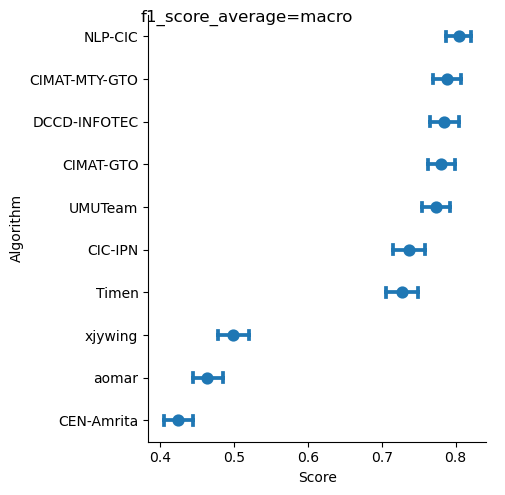

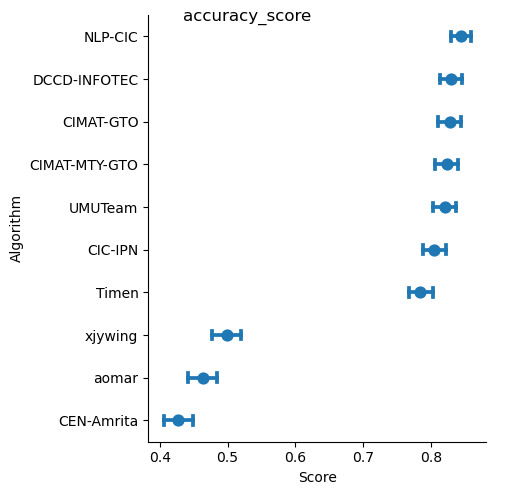

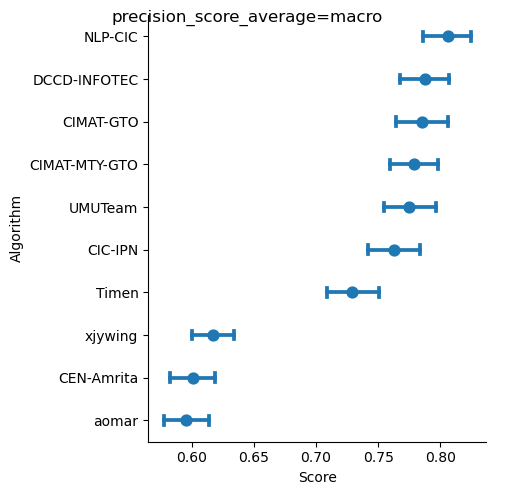

In [8]:
face_grid = plot_performance_multiple(perf_recuperado)

In [9]:
diff = difference_multiple(perf) 

In [10]:
for metric, diffs in diff['winner'].items():
    print(f"For {metric} the best performing system is {diffs['best']}")

For f1_score_average=macro the best performing system is NLP-CIC
For accuracy_score the best performing system is NLP-CIC
For precision_score_average=macro the best performing system is NLP-CIC


In [11]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['CI'].items():
        print(f"CI for {key} {value}")



For the metric f1_score_average=macro the best is NLP-CIC
CI for aomar (0.31570773154378856, 0.3654026807466033)
CI for CEN-Amrita (0.3568798326728204, 0.4042596050228186)
CI for CIC-IPN (0.045873773726835175, 0.08851279231288409)
CI for CIMAT-GTO (0.007336573866097435, 0.04105165083961278)
CI for CIMAT-MTY-GTO (-0.001482480361881927, 0.03375869018387771)
CI for DCCD-INFOTEC (-0.0018121790316169032, 0.04140279109459608)
CI for Timen (0.05374150082850559, 0.09897426309979497)
CI for UMUTeam (0.012310105276670816, 0.04928486183564875)
CI for xjywing (0.2803815136827837, 0.3304414078334099)

For the metric accuracy_score the best is NLP-CIC
CI for aomar (0.35500458085203845, 0.4072491983508933)
CI for CEN-Amrita (0.3898305084745763, 0.44343792945487864)
CI for CIC-IPN (0.023820430600091647, 0.05771873568483732)
CI for CIMAT-GTO (0.0031951442968391314, 0.030703160787906643)
CI for CIMAT-MTY-GTO (0.005497022446175004, 0.035730645900137414)
CI for DCCD-INFOTEC (-0.001832340815391742, 0.0316

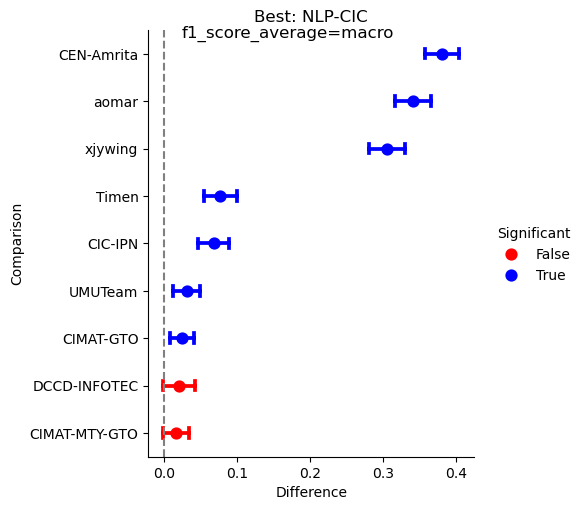

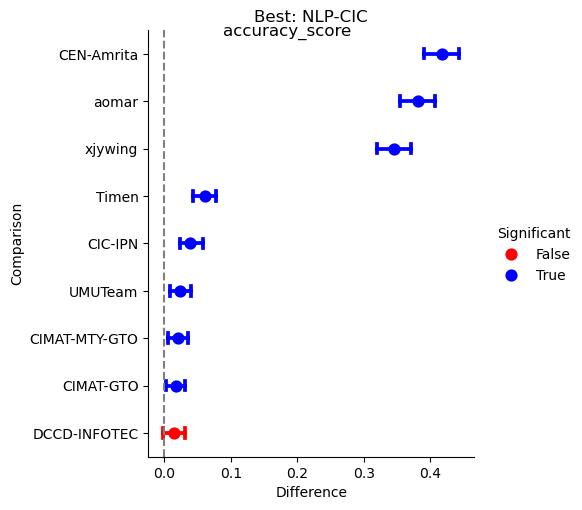

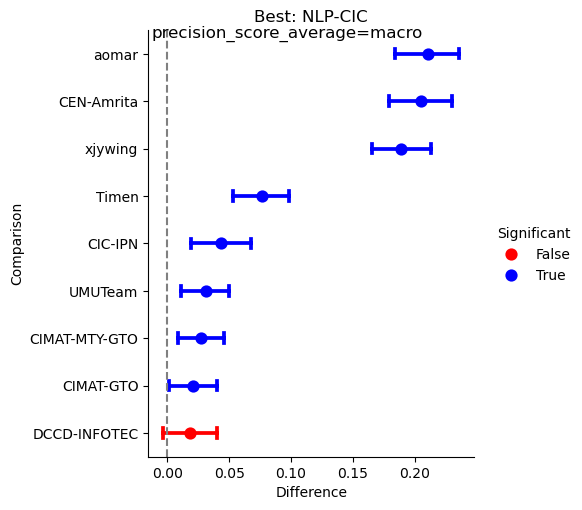

In [12]:
face_grid_diff = plot_difference_multiple(diff)

In [13]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference with {key} {value}")


For the metric f1_score_average=macro the best is NLP-CIC
p-value for the difference with aomar 0.0
p-value for the difference with CEN-Amrita 0.0
p-value for the difference with CIC-IPN 0.0
p-value for the difference with CIMAT-GTO 0.005
p-value for the difference with CIMAT-MTY-GTO 0.039
p-value for the difference with DCCD-INFOTEC 0.033
p-value for the difference with Timen 0.0
p-value for the difference with UMUTeam 0.0
p-value for the difference with xjywing 0.0

For the metric accuracy_score the best is NLP-CIC
p-value for the difference with aomar 0.0
p-value for the difference with CEN-Amrita 0.0
p-value for the difference with CIC-IPN 0.0
p-value for the difference with CIMAT-GTO 0.008
p-value for the difference with CIMAT-MTY-GTO 0.002
p-value for the difference with DCCD-INFOTEC 0.037
p-value for the difference with Timen 0.0
p-value for the difference with UMUTeam 0.001
p-value for the difference with xjywing 0.0

For the metric precision_score_average=macro the best is NL

In [14]:
correction = 'bonferroni'
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')


For the metric f1_score_average=macro the best is NLP-CIC
aomar, p-value corrected by bonferroni = 0.0
CEN-Amrita, p-value corrected by bonferroni = 0.0
CIC-IPN, p-value corrected by bonferroni = 0.0
CIMAT-GTO, p-value corrected by bonferroni = 0.045
CIMAT-MTY-GTO, p-value corrected by bonferroni = 0.351
DCCD-INFOTEC, p-value corrected by bonferroni = 0.29700000000000004
Timen, p-value corrected by bonferroni = 0.0
UMUTeam, p-value corrected by bonferroni = 0.0
xjywing, p-value corrected by bonferroni = 0.0

For the metric accuracy_score the best is NLP-CIC
aomar, p-value corrected by bonferroni = 0.0
CEN-Amrita, p-value corrected by bonferroni = 0.0
CIC-IPN, p-value corrected by bonferroni = 0.0
CIMAT-GTO, p-value corrected by bonferroni = 0.07200000000000001
CIMAT-MTY-GTO, p-value corrected by bonferroni = 0.018000000000000002
DCCD-INFOTEC, p-value corrected by bonferroni = 0.33299999999999996
Timen, p-value corrected by bonferroni = 0.0
UMUTeam, p-value corrected by bonferroni = 0.

In [15]:
all_diff = all_differences_multiple(perf)


In [16]:
all_diff['compg']

{'n': 2183,
 'm': 10,
 'cv': {'f1_score_average=macro': 22.4145824216441,
  'accuracy_score': 24.367316618878487,
  'precision_score_average=macro': 11.7286805237006},
 'dist': {'f1_score_average=macro': 0.049291143332640175,
  'accuracy_score': 0.03183692166743002,
  'precision_score_average=macro': 0.03703962106585057},
 'PPI': {'f1_score_average=macro': 19.570320712429833,
  'accuracy_score': 15.529088410444347,
  'precision_score_average=macro': 19.424214983547174}}

In [17]:
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric} ")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference {key} {value}")


For the metric f1_score_average=macro 
p-value for the difference NLP-CIC vs CIMAT-MTY-GTO 0.039
p-value for the difference NLP-CIC vs DCCD-INFOTEC 0.033
p-value for the difference NLP-CIC vs CIMAT-GTO 0.005
p-value for the difference NLP-CIC vs UMUTeam 0.0
p-value for the difference NLP-CIC vs CIC-IPN 0.0
p-value for the difference NLP-CIC vs Timen 0.0
p-value for the difference NLP-CIC vs xjywing 0.0
p-value for the difference NLP-CIC vs aomar 0.0
p-value for the difference NLP-CIC vs CEN-Amrita 0.0
p-value for the difference CIMAT-MTY-GTO vs DCCD-INFOTEC 0.373
p-value for the difference CIMAT-MTY-GTO vs CIMAT-GTO 0.154
p-value for the difference CIMAT-MTY-GTO vs UMUTeam 0.039
p-value for the difference CIMAT-MTY-GTO vs CIC-IPN 0.0
p-value for the difference CIMAT-MTY-GTO vs Timen 0.0
p-value for the difference CIMAT-MTY-GTO vs xjywing 0.0
p-value for the difference CIMAT-MTY-GTO vs aomar 0.0
p-value for the difference CIMAT-MTY-GTO vs CEN-Amrita 0.0
p-value for the difference DCCD-

In [18]:
correction = 'bonferroni'
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')


For the metric f1_score_average=macro
NLP-CIC vs CIMAT-MTY-GTO, p-value corrected by bonferroni = 1.0
NLP-CIC vs DCCD-INFOTEC, p-value corrected by bonferroni = 1.0
NLP-CIC vs CIMAT-GTO, p-value corrected by bonferroni = 0.225
NLP-CIC vs UMUTeam, p-value corrected by bonferroni = 0.0
NLP-CIC vs CIC-IPN, p-value corrected by bonferroni = 0.0
NLP-CIC vs Timen, p-value corrected by bonferroni = 0.0
NLP-CIC vs xjywing, p-value corrected by bonferroni = 0.0
NLP-CIC vs aomar, p-value corrected by bonferroni = 0.0
NLP-CIC vs CEN-Amrita, p-value corrected by bonferroni = 0.0
CIMAT-MTY-GTO vs DCCD-INFOTEC, p-value corrected by bonferroni = 1.0
CIMAT-MTY-GTO vs CIMAT-GTO, p-value corrected by bonferroni = 1.0
CIMAT-MTY-GTO vs UMUTeam, p-value corrected by bonferroni = 1.0
CIMAT-MTY-GTO vs CIC-IPN, p-value corrected by bonferroni = 0.0
CIMAT-MTY-GTO vs Timen, p-value corrected by bonferroni = 0.0
CIMAT-MTY-GTO vs xjywing, p-value corrected by bonferroni = 0.0
CIMAT-MTY-GTO vs aomar, p-value corr